<p style="text-align:center;"><span style="font-size:48px;"><span style="color:#106BA9;"><span style="font-family:cursive;"> Hello everyone! </span> </span>  </span></p>

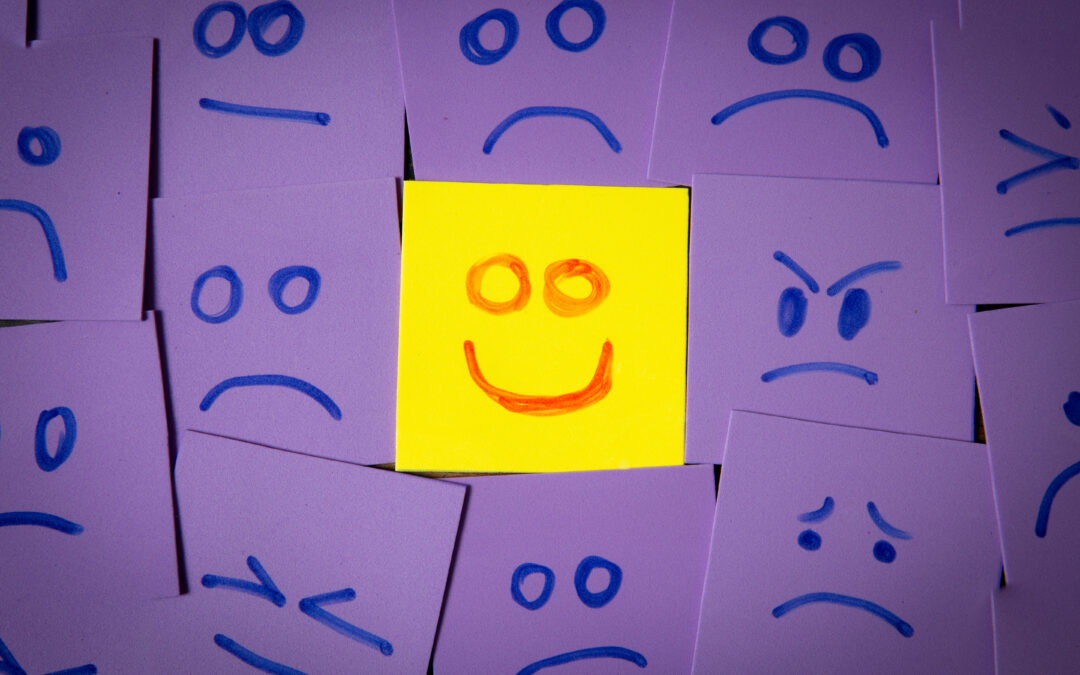

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


Speech is the most natural way of expressing ourselves as humans. It is only natural then to extend this communication medium to computer applications. We define speech emotion recognition (SER) systems as a collection of methodologies that process and classify speech signals to detect the embedded emotions. SER is not a new field, it has been around for over two decades, and has regained attention thanks to the recent advancements. These novel studies make use of the advances in all fields of computing and technology, making it necessary to have an update on the current methodologies and techniques that make SER possible. We have identified and discussed distinct areas of SER, provided a detailed survey of current literature of each, and also listed the current challenges.

<a id="0"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>

<div style = 'border : 3px solid non; background-color:#f2f2f2
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


* **[1. A Brief Explanation](#1)**
    
  - What is the dataset about?
    
  - Why LSTM for Speech Recognition?
   
       
    
* **[2. Import Libraries ](#2)**
    
  - Libraries that we need in this project
  
  
* **[3. Import Dataset ](#3)**  
    
   - Calling the datasets (4 dataset)
   
      
* **[4. Data PreProcessing ](#4)**   

   - Label encoding from name of audios
    
   - Plot the details of each dataset
    
   - Concat all of the datasets
    
   - Waveplot
    
   - Amplitude Envelope
    
   - Augmentation (Noise, Stretch)
    
* **[5. Data PreParation ](#5)**
        
   - Only Crema
    
   - Extract mfcc
    
   - Array and Dimention
  
    
* **[6. LSTM Model ](#6)**
    
   - Structure of Model
    
   - Evaluation

* **[Table of Content](#0)**

<a id="1"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Brief Explanation </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1- What is the dataset about?**

    - Here 4 most popular datasets in English: Crema, Ravdess, Savee and Tess. Each of them contains   audio in .wav format with some main labels.

    **Ravdess:*

    Here is the filename identifiers as per the official RAVDESS website:

    Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
    
    Vocal channel (01 = speech, 02 = song).
    
    Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
    
    Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
    
    Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
    
    Repetition (01 = 1st repetition, 02 = 2nd repetition).
    
    Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
    
    **So, here's an example of an audio filename. 02-01-06-01-02-01-12.wav This means the meta data for the audio file is:*

    Video-only (02)
    
    Speech (01)
    
    Fearful (06)
    
    Normal intensity (01)
    
    Statement "dogs" (02)
    
    1st Repetition (01)
    
    12th Actor (12) - Female (as the actor ID number is even)
    
    **Crema:*

    The third component is responsible for the emotion label:

    SAD - sadness;
    
    ANG - angry;
    
    DIS - disgust;
    
    FEA - fear;
    
    HAP - happy;
    
    NEU - neutral.
    
    **Tess:*

    Very similar to Crema - label of emotion is contained in the name of file.

    **Savee:*

    The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:
    
    'a' = 'anger'
    
    'd' = 'disgust'
    
    'f' = 'fear'
    
    'h' = 'happiness'
    
    'n' = 'neutral'
    
    'sa' = 'sadness'
    
    'su' = 'surprise'

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Why LSTM for Speech Recognition?**

  - Long Short-Term Memory (LSTM) networks are particularly useful for speech recognition due to their ability to model sequential dependencies effectively. Unlike traditional feedforward neural networks, LSTMs can retain context information over longer time spans, making them well-suited for capturing the temporal patterns present in speech signals. By learning from past observations and adjusting their internal states, LSTMs can handle variable-length input sequences, adapt to different speech speeds, and extract relevant features for accurate recognition. Their robustness to time delays and capacity to capture long-range dependencies contribute to their state-of-the-art performance in this domain.

* **[Table of Content](#0)**

<a id="2"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

* **[Table of Content](#0)**

<a id="3"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

In [ ]:
Root_dir = '/kaggle/input/speech-emotion-recognition-en'

In [ ]:
Crema_path = Root_dir + "/Crema/" 
Ravdess_path = Root_dir + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = Root_dir + "/Savee/"
Tess_path = Root_dir + "/Tess/"

In [ ]:
Crema_dir_list = os.listdir(Crema_path)
Ravdess_dir_list = os.listdir(Ravdess_path)
Savee_dir_list = os.listdir(Savee_path)
Tess_dir_list = os.listdir(Tess_path)

* **[Table of Content](#0)**

<a id="4"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data PreProcessing </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1- Label encoding from name of audios**

  - There isn't any files or columns for label of each audio. But, in the name of all of them, there is a code for extracting the labels.

# Crema

In [ ]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

In [ ]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')
        
# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
Crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})


In [ ]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

In [ ]:
font1 = {'family':'Times New Roman','color':'blue','size':30}
font2 = {'family':'Times New Roman','color':'blue','size':20}
font3 = {'family':'Times New Roman','color':'blue','size':10}

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Plot the details of each dataset**

  - We can see the number of samples of each classes. Also we can consider the balance of the 
    datasets.


In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

# Ravdess

In [ ]:
Ex_Ravdess_dir_list = Ravdess_dir_list[:15]
Ex_Ravdess_dir_list

That's not enough


In [ ]:
emotions_ravdess = []
path_ravdess = []

for it in Ravdess_dir_list:
    # There are 20 actors  
    actor = os.listdir(Ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        emotions_ravdess.append(int(part[2]))
        path_ravdess.append(Ravdess_path + it + '/' + file)
    
    
emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm',
                             3:'happy', 4:'sad', 5:'angry',
                             6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
[Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

# Savee

In [ ]:
Ex_Savee_dir_list = Savee_dir_list[:15]
Ex_Savee_dir_list

In [ ]:
emotions_savee = []
path_savee = []

for it in Savee_dir_list:
    path_savee.append(Savee_path + it)
    part = it.split('_')[1]
    part = part[:-6]
    if part == 'a':
        emotions_savee.append('angry')
    elif part == 'd':
        emotions_savee.append('disgust')
    elif part == 'f':
        emotions_savee.append('fear')
    elif part == 'h':
        emotions_savee.append('happiness')
    elif part == 'n':
        emotions_savee.append('neutral')
    elif part == 'sa':
        emotions_savee.append('sadness')
    elif part == 'su':
        emotions_savee.append('surprise')
        
    else:
        emotions_savee.append('Unknown')
        
# dataframe for emotion of files
emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

# dataframe for path of files.
path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)
Savee_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
[Savee_df["Emotions"].unique().tolist() for i in Savee_df.columns]

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Savee_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [ ]:
Ex_Tess_dir_list = Tess_dir_list[:15]
Ex_Tess_dir_list

# Tess

In [ ]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotions_tess.append('surprise')
        else:
            emotions_tess.append(part)
        path_tess.append(Tess_path + it + '/' + file)
        
        
        
# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Tess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3- Plot the details of each dataset**

  - It's time to connect all of the datasets to each other. If we want to use all of them in one model.
    But I want to use **Crema** only.


In [ ]:
Sum_df = pd.concat([Crema_df, Ravdess_df, Savee_df, Tess_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


What if we replace "Happines" to "Happy" and "Sadnees" to "Sad" and "calm" to "neutral".
I know that there are some differences between calm and neutal in meaning, but for avoiding unbalance samples, we can replace calm to neutral.

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


As adjectives the difference between calm and neutralis that calm is peaceful, quiet, especially free from anger and anxiety while neutral is not taking sides in a conflict such as war; nonaligned.
As nouns the difference between calm and neutralis that calm is the state of being calm; peacefulness; absence of worry, anger, fear or other strong negative emotion while neutral is a nonaligned state, or a member of such a state.

In [ ]:
Sum_df_rep = Sum_df
Sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
Sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
Sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [ ]:
[Sum_df_rep["Emotions"].unique().tolist() for i in Sum_df_rep.columns]

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

Seems better

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **4- Waveplot**

  - Waveforms are essential representations of speech signals, capturing the pressure variations that travel through the air. However, when analyzing speech, we often need to focus on specific segments or phonemes within the signal. This is where the Short-Time Fourier Transform (STFT) becomes valuable.


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

**Quantization: audio-to-digital conversion**

The analog-to-digital conversion process is called quantization and it's very similar to the way cameras capture video. A video camera reconstructs a continuous moment in time by capturing thousands of consecutive images per second, called frames. The higher the frame rate, the smoother the movie. In digital audio, an anlog-to-digital converter captures thousands of audio samples per second at a specified sample rate and bit depth to reconstruct the original signal. The higher the sample rate and bit depth, the higher the audio resolution.

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


**Sample rate** is the number of samples per second that are taken of a waveform to create a discrete digital signal. The higher the sample rate, the more snapshots you capture of the audio signal. The audio sample rate is measured in kilohertz (kHz) and it determines the range of frequencies captured in digital audio. In most DAWs, you’ll find an adjustable sample rate in your audio preferences. This controls the sample rate for audio in your project.

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

If you’re recording music, a standard sample rate is **44.1 kHz or 44,100 samples per second**. This is the standard for most consumer audio, used for formats like CDs. 48 kHz is another common audio sample rate used for movies. The higher sample rate technically leads to more measurements per second and a closer recreation of the original audio, so 48kHz is often used in audio for video which usually calls for a big dynamic range.

In [ ]:
%%time
audio_arrays = []

for i in Sum_df_rep['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)
    
Sum_df_rep['Arrays'] = audio_arrays

In [ ]:
Sum_df_rep.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
happy_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Happy', fontdict= font2)
plt.show()

Audio(happy_sp.iloc[0])

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000,30000)', fontdict= font2)
plt.show()

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000, 20500)', fontdict= font2)
plt.show()

In [ ]:
fear_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Path']
fear_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Fear', fontdict= font2)
plt.show()

Audio(fear_sp.iloc[0])

In [ ]:
disgust_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Path']
disgust_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Disgust', fontdict= font2)
plt.show()

Audio(disgust_sp.iloc[0])

In [ ]:
sad_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Sad', fontdict= font2)
plt.show()

Audio(sad_sp.iloc[0])

In [ ]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Angry', fontdict= font2)
plt.show()

Audio(angry_sp.iloc[0])

In [ ]:
neutral_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Path']
neutral_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Neutral', fontdict= font2)
plt.show()

Audio(neutral_sp.iloc[0])

In [ ]:
surprise_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Path']
surprise_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(surprise_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Surprise', fontdict= font2)
plt.show()

Audio(surprise_sp.iloc[0])

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **5- Amplitude Envelope**

  - The amplitude envelope in speech recognition refers to the variation in signal intensity over time. It captures the envelope shape of the speech waveform, highlighting the rise and fall of energy during each syllable or phoneme. While spectral details provide information about individual speech sounds, the amplitude envelope is crucial when spectral resolution is limited.


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>



  In speech recognition, the sample duration refers to the time window over which audio data is    analyzed. When capturing audio, you can specify a duration for recording or listening.

In [ ]:
sample_duration = 1/sr
print(sample_duration)

In [ ]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

In [ ]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512 

#calculate the amplitude envelope

def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []
    
    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)
        
    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):
    
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [ ]:
# Samples

Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]
Sp_surprise = surprise_arr.iloc[0]

In [ ]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)
AE_surprise = amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral),
     len(AE_surprise), len(AE_sad))


In [ ]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)
fancy_AE_surprise = fancy_amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),
     len(fancy_AE_surprise), len(fancy_AE_sad))

In [ ]:
(AE_fear == fancy_AE_fear).all()

In [ ]:
#Visualize amplitude envelope for all the audio files (Samples of each)

frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)
frames_surprise = range(0, AE_surprise.size)

t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)
t7 = librosa.frames_to_time(frames_surprise, hop_length = Hop_lenght)


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,7)
librosa.display.waveshow(Sp_surprise, alpha = 0.5)
plt.plot(t7, AE_surprise, color = "r")
plt.title("Surprise", fontdict= font2)
plt.show()

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **6- Augmentation (Noise, Stretch)**

  - Data augmentation plays a crucial role in improving the performance of speech recognition models. Let’s explore two common audio augmentation techniques: noise injection and time stretching.Data augmentation plays a crucial role in improving the performance of speech recognition models. Let’s explore two common audio augmentation techniques: noise injection and time stretching.
    
    **Noise Injection:** Adding noise to the audio data helps the model become more robust to real-world variations.Adding noise to the audio data helps the model become more robust to real-world variations.
    
    **Time Stretching:** Time stretching alters the duration of an audio clip without changing its pitch.Time stretching alters the duration of an audio clip without changing its pitch.



In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Sum_df_rep.Path)[1]
data, sample_rate = librosa.load(path)

In [ ]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Simple)', fontdict= font2)
plt.show()

Audio(Simple_data, rate=sample_rate)

In [ ]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Noise)', fontdict= font2)
plt.show()

Audio(Noise_data, rate=sample_rate)

In [ ]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Stretch)', fontdict= font2)
plt.show()

Audio(Stretch_data, rate=sample_rate)

* **[Table of Content](#0)**

<a id="5"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data PreParation </p>


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1- Only Crema**

  - In this project, I'm going to consider **Crema** dataset only.


In [ ]:
Crema_df

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Extract mfcc**

  - Mel-frequency cepstral coefficients (MFCC) are a feature extraction technique widely used in speech and audio processing.


In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [ ]:
extract_mfcc(Crema_df['Path'][0])

In [ ]:
%%time
X_mfcc = Crema_df['Path'].apply(lambda x: extract_mfcc(x))

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3- Array and Dimention**

  - In speech recognition, the concept of expanding dimensions typically refers to increasing the feature space of input data. Array, speech signals are continuous waveforms.


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

In [ ]:
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [ ]:
y = y.toarray()

* **[Table of Content](#0)**

<a id="6"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">LSTM Model </p>


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1- Structure of Model**

  - You can see the structure of LSTM in the cell below. Categorical_crossentropy for loss evaluation, ADAM as optimizer, validation split = 0.2 all of the Crema dataset, number of epochs = 500 and batchsize is 64.

In [ ]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)

In [ ]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=500, batch_size=64)

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Evaluation**

  - The accuracy and loss of model can be seen in the cells below.

In [ ]:
epochs = list(range(500))
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('accuracy', fontdict= font2)
plt.title('Acc', fontdict= font2)
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('loss', fontdict= font2)
plt.title('Loss', fontdict= font2)
plt.show()

* **[Table of Content](#0)**


# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Warm Wishes</p>